<h1>1. OVERVIEW DATA</h1>

In [76]:
# import library pendukung
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [77]:
# membaca dataset 5 teratas
df = pd.read_csv("archive/Country-data.csv", index_col="country")
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [78]:
# membaca dataset 5 terbawah
df.tail()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [79]:
# menampilkan ukuran dataset
df.shape

(167, 9)

In [80]:
# menampilkan tipe data pada dataset
df.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [81]:
# menampilkan kolom/features pada dataset
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [82]:
# menampilkan deskripsi dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<h1>2. DATA CLEANING</h1>

In [83]:
# cek duplikasi pada dataset
print('Duplikasi pada dataset:', df.duplicated().sum())

Duplikasi pada dataset: 0


In [84]:
# cek null values pada dataset
for col in df.columns:
    print('{} - Null: {}'.format(col, df[col].isnull().sum()))

child_mort - Null: 0
exports - Null: 0
health - Null: 0
imports - Null: 0
income - Null: 0
inflation - Null: 0
life_expec - Null: 0
total_fer - Null: 0
gdpp - Null: 0


In [85]:
# fungsi untuk membuat chart boxplot yang menjelaskan outlier tiap kolom
def outlier(col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    left_lim = q1 - iqr*1.5
    right_lim = q3 + iqr*1.5
    outliers = {'country':[], col:[]}

    for i,c in enumerate(df[col]):
        if c < left_lim:
            outliers['country'].append(df[col].index[i])
            outliers[col].append(c)
        elif c > right_lim:
            outliers['country'].append(df[col].index[i])
            outliers[col].append(c)
        
    outliers_df = pd.DataFrame(outliers)
    outliers_df.set_index('country', inplace=True)
    
    print('{} - outliers: {}%'.format(col, round(outliers_df.shape[0]/df.shape[0]*100,2)))
    return outliers_df

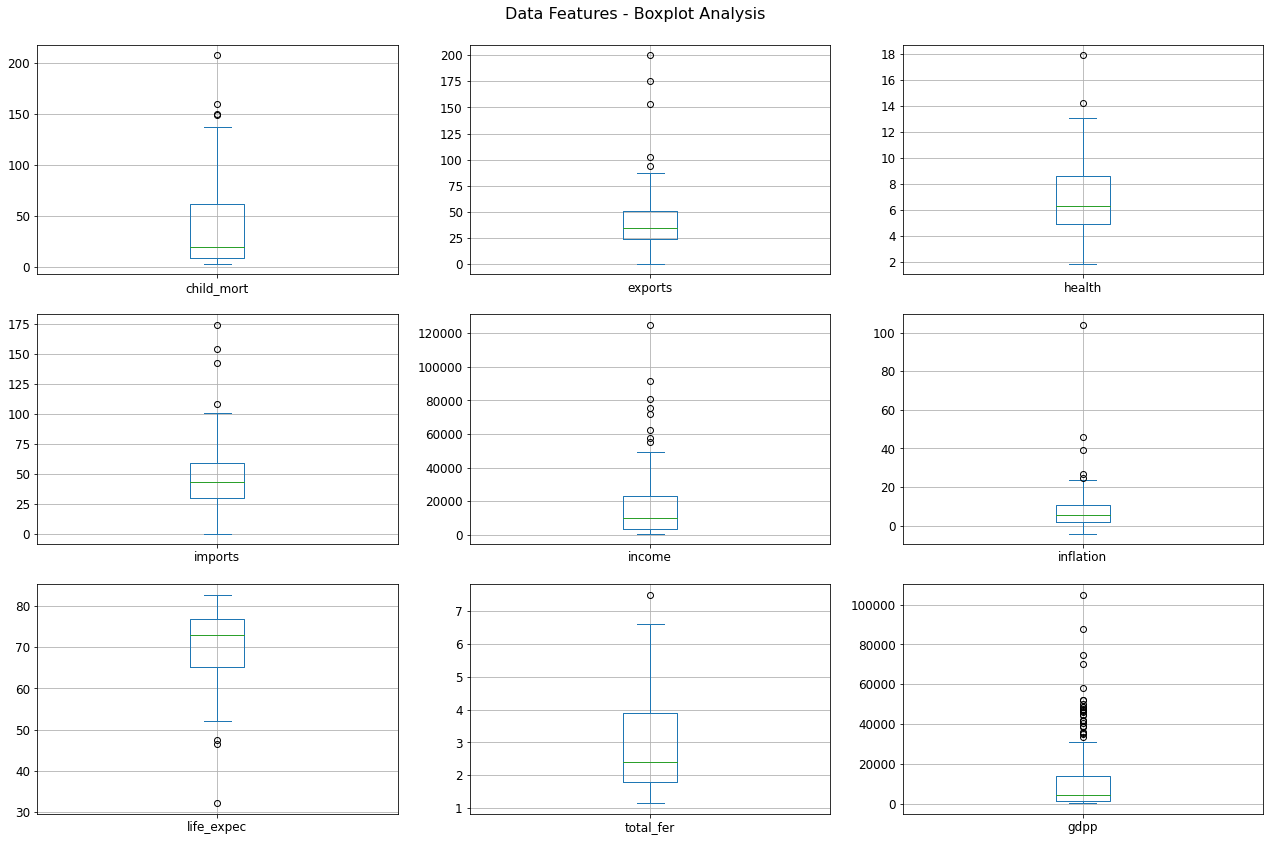

In [86]:
# menampilkan chart boxplot
fig = plt.figure(figsize=(18,12))
child_mort = fig.add_subplot(3,3,1)
exports = fig.add_subplot(3,3,2)
health = fig.add_subplot(3,3,3)
imports = fig.add_subplot(3,3,4)
income = fig.add_subplot(3,3,5)
inflation = fig.add_subplot(3,3,6)
life_expec = fig.add_subplot(3,3,7)
total_fer = fig.add_subplot(3,3,8)
gdpp = fig.add_subplot(3,3,9)

df['child_mort'].plot(kind='box', fontsize=12, ax=child_mort)
child_mort.grid(True)
df['exports'].plot(kind='box', fontsize=12,ax=exports)
exports.grid(True)
df['health'].plot(kind='box', fontsize=12,ax=health)
health.grid(True)
df['imports'].plot(kind='box', fontsize=12,ax=imports)
imports.grid(True)
df['income'].plot(kind='box', fontsize=12,ax=income)
income.grid(True)
df['inflation'].plot(kind='box', fontsize=12,ax=inflation)
inflation.grid(True)
df['life_expec'].plot(kind='box', fontsize=12,ax=life_expec)
life_expec.grid(True)
df['total_fer'].plot(kind='box', fontsize=12,ax=total_fer)
total_fer.grid(True)
df['gdpp'].plot(kind='box', fontsize=12,ax=gdpp)
gdpp.grid(True)

fig.suptitle('Data Features - Boxplot Analysis', fontsize=16)
plt.tight_layout(pad=2)
plt.show()

In [87]:
# menampilkan persentase outlier
outlier('child_mort')

child_mort - outliers: 2.4%


,child_mort
country,
Central African Republic,149.0
Chad,150.0
Haiti,208.0
Sierra Leone,160.0


In [88]:
# menampilkan persentase outlier
outlier('exports')

exports - outliers: 2.99%


,exports
country,
Ireland,103.0
Luxembourg,175.0
Malta,153.0
Seychelles,93.8
Singapore,200.0


In [89]:
# menampilkan persentase outlier
outlier('health')

health - outliers: 1.2%


,health
country,
"Micronesia, Fed. Sts.",14.2
United States,17.9


In [90]:
# menampilkan persentase outlier
outlier('imports')

imports - outliers: 2.4%


,imports
country,
Luxembourg,142.0
Malta,154.0
Seychelles,108.0
Singapore,174.0


In [91]:
# menampilkan persentase outlier
outlier('income')

income - outliers: 4.79%


,income
country,
Brunei,80600
Kuwait,75200
Luxembourg,91700
Norway,62300
Qatar,125000
Singapore,72100
Switzerland,55500
United Arab Emirates,57600


In [92]:
# menampilkan persentase outlier
outlier('inflation')

inflation - outliers: 2.99%


,inflation
country,
Equatorial Guinea,24.9
Mongolia,39.2
Nigeria,104.0
Timor-Leste,26.5
Venezuela,45.9


In [93]:
# menampilkan persentase outlier
outlier('life_expec')

life_expec - outliers: 1.8%


,life_expec
country,
Central African Republic,47.5
Haiti,32.1
Lesotho,46.5


In [94]:
# menampilkan persentase outlier
outlier('total_fer')

total_fer - outliers: 0.6%


,total_fer
country,
Niger,7.49


In [95]:
# menampilkan persentase outlier
outlier('gdpp')

gdpp - outliers: 14.97%


,gdpp
country,
Australia,51900
Austria,46900
Belgium,44400
Brunei,35300
Canada,47400
Denmark,58000
Finland,46200
France,40600
Germany,41800


<h1>3. EKSPLORASI DATA</h1>

In [96]:
# menampilkan deskripsi dataset
df.describe(include='all')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


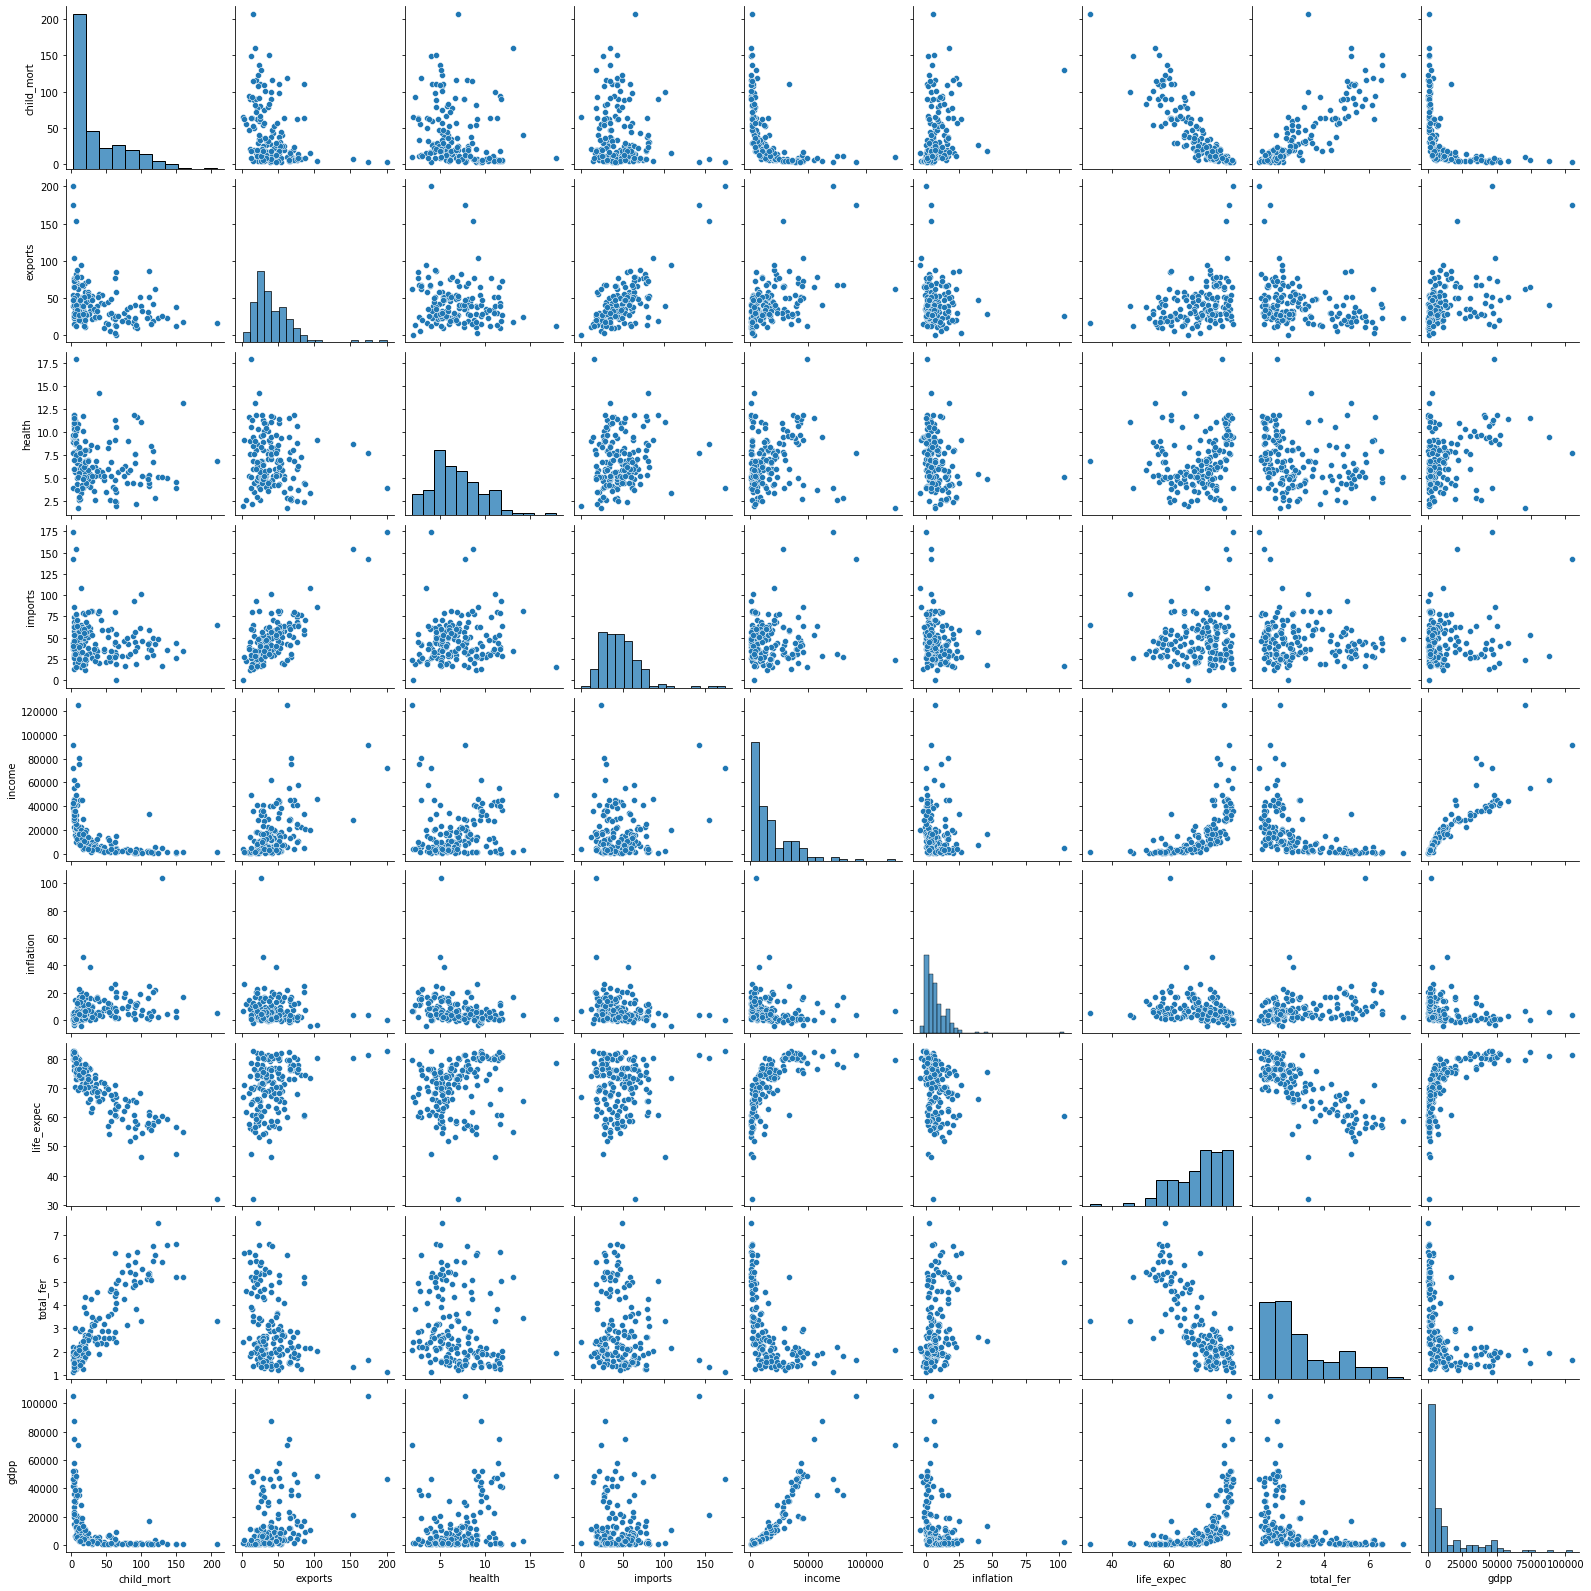

In [97]:
# memvisualkan dataset kedalam bentuk diagram
sns.pairplot(df)
plt.show()

<h1>3.1 DISTRIBUSI</h1>

In [98]:
# menampilkan distribusi data
df.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

In [99]:
# fungsi untuk mengecek distribusi kolom normal atau tidak dengan nilai acuan 0.75
def normalisasi(data):
    for var in range(len(data.skew())):
        if abs(data.skew()[var]) > 0.75:
            print('"{}" skew: {}. Variabel terdistribusi dengan TIDAK normal.'.format(data.skew().index[var],
                                                                                    round(data.skew()[var],2)))
        else:
            print('"{}" skew: {}. Variabel terdistribusi dengan normal'.format(data.skew().index[var],
                                                                                round(data.skew()[var],2)))
            
normalisasi(df)

"child_mort" skew: 1.45. Variabel terdistribusi dengan TIDAK normal.
"exports" skew: 2.45. Variabel terdistribusi dengan TIDAK normal.
"health" skew: 0.71. Variabel terdistribusi dengan normal
"imports" skew: 1.91. Variabel terdistribusi dengan TIDAK normal.
"income" skew: 2.23. Variabel terdistribusi dengan TIDAK normal.
"inflation" skew: 5.15. Variabel terdistribusi dengan TIDAK normal.
"life_expec" skew: -0.97. Variabel terdistribusi dengan TIDAK normal.
"total_fer" skew: 0.97. Variabel terdistribusi dengan TIDAK normal.
"gdpp" skew: 2.22. Variabel terdistribusi dengan TIDAK normal.


<h1>3.2 KORELASI</h1>

In [100]:
# menghitung korelasi antar kolomnya
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<h1>3.3 TRANSFORMASI DISTRIBUSI DATA</h1>

In [101]:
# fungsi untuk melakukan transformasi kolom menggunakan boxcox
def transformasi(data):
    lam = []
    for col in data.columns:
        if abs(data[col].skew()) > 0.75:
            data[col], lam_val = boxcox(data[col] + abs(df.min().min())+0.001)
            lam.append(lam_val)
    return data, lam

In [102]:
# melakukan transformasi dan menghitung distribusi datanya
bc_data = df.copy() 
bc_data, lambda_list = transformasi(bc_data) 
bc_data.skew()

child_mort    0.062932
exports       0.030569
health        0.705746
imports       0.069233
income       -0.035718
inflation     0.418363
life_expec   -0.182171
total_fer     0.199942
gdpp          0.001558
dtype: float64

In [103]:
# mengecek distribusi kolom setelah dilakukan transformasi
normalisasi(bc_data)

"child_mort" skew: 0.06. Variabel terdistribusi dengan normal
"exports" skew: 0.03. Variabel terdistribusi dengan normal
"health" skew: 0.71. Variabel terdistribusi dengan normal
"imports" skew: 0.07. Variabel terdistribusi dengan normal
"income" skew: -0.04. Variabel terdistribusi dengan normal
"inflation" skew: 0.42. Variabel terdistribusi dengan normal
"life_expec" skew: -0.18. Variabel terdistribusi dengan normal
"total_fer" skew: 0.2. Variabel terdistribusi dengan normal
"gdpp" skew: 0.0. Variabel terdistribusi dengan normal


Pairplot - Setelah ditransformasi


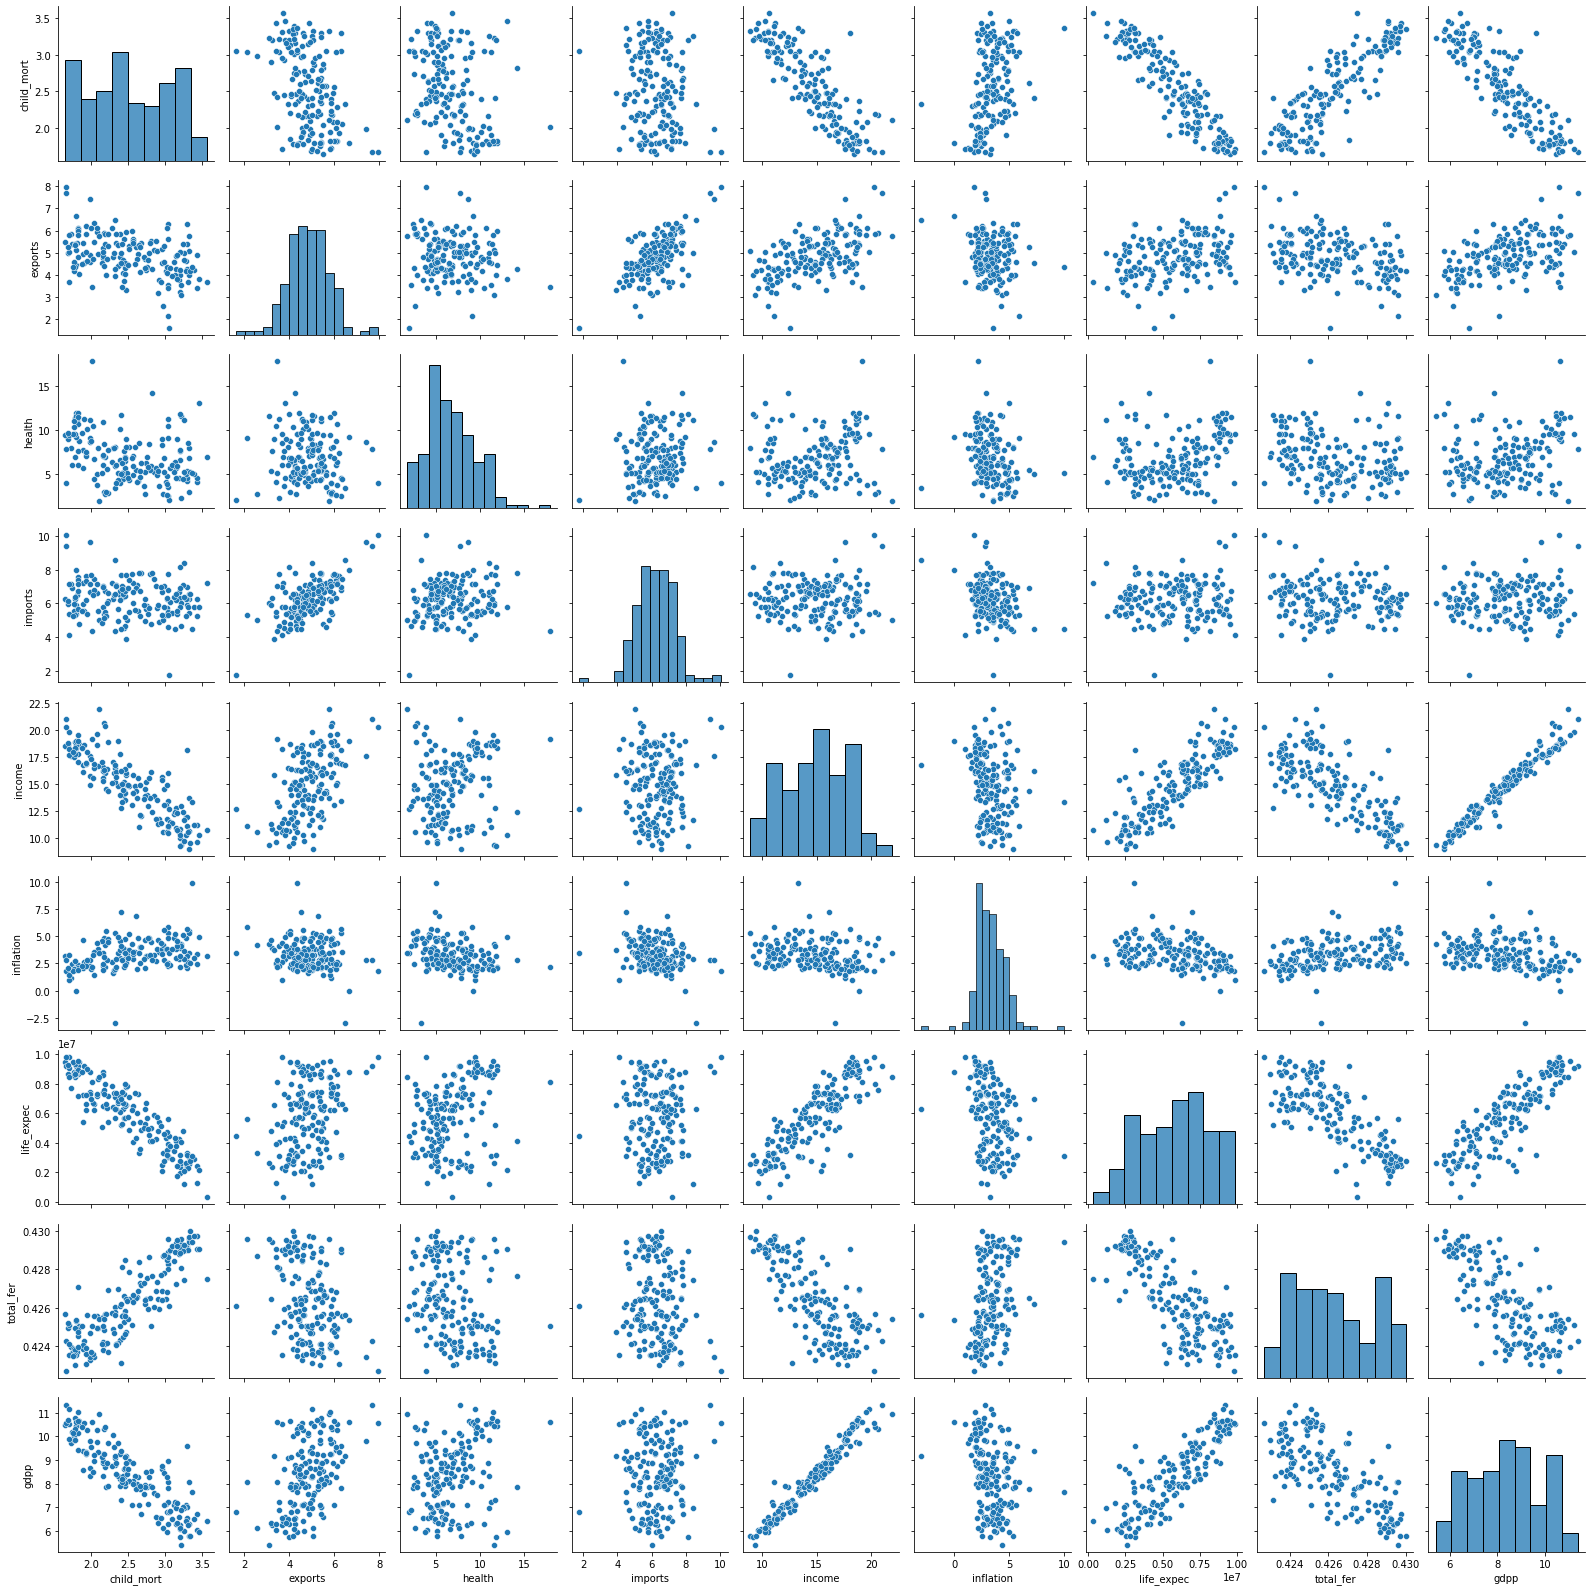

In [104]:
# memvisualkan dataset kedalam bentuk diagram setelah dilakukan transformasi
print('Pairplot - Setelah ditransformasi')
sns.pairplot(bc_data)
plt.show()

In [105]:
# kondisi dataset setelah dilakukan transformasi
bc_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,3.208692,3.225288,7.58,6.341887,10.816138,3.902316,2.364493e+06,0.429421,6.259053
Albania,2.392947,4.491850,6.55,6.523385,14.899242,3.004359,7.271084e+06,0.424320,8.207013
Algeria,2.637163,4.959927,4.17,5.574598,15.548799,4.797498,7.341982e+06,0.426892,8.291235
Angola,3.332581,5.744331,2.85,6.239373,13.655328,5.467484,3.019940e+06,0.429574,8.063779
Antigua and Barbuda,2.166808,5.225818,6.03,6.981822,16.554714,2.246702,7.449293e+06,0.425514,9.268509
...,...,...,...,...,...,...,...,...,...
Vanuatu,2.670315,5.264054,5.25,6.713447,12.094787,2.568010,3.588515e+06,0.427690,7.895698
Venezuela,2.407374,4.517135,4.91,4.509590,16.175146,7.257570,6.958327e+06,0.426195,9.366695
Vietnam,2.559065,5.994266,6.84,7.772154,13.027747,4.290725,6.204549e+06,0.425102,7.098660


<h1>3.4 SCALING</h1>

In [106]:
# menampilkan deskripsi dataset setelah dilakukan transformasi
bc_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,167.000000
mean,2.524776,4.844862,6.815689,6.251297,14.862237,3.291616,5.851162e+06,0.426303,8.383147
std,0.534895,0.939880,2.746837,1.111198,2.964398,1.373132,2.293182e+06,0.001998,1.457027
min,1.646846,1.626900,1.810000,1.729543,8.919017,-2.993101,3.229176e+05,0.422675,5.412789
25%,2.066908,4.265022,4.920000,5.496081,12.376412,2.352180,4.093244e+06,0.424714,7.113308
50%,2.466485,4.818866,6.320000,6.260140,14.906637,3.190764,6.204549e+06,0.426083,8.333889
75%,3.035741,5.421425,8.600000,6.975567,17.021319,4.099667,7.449293e+06,0.428090,9.404664
max,3.569427,7.955873,17.900000,10.066584,21.941206,9.925202,9.850892e+06,0.430040,11.349325


In [107]:
# melakukan scaling pada data yang sudah di transformasi
scaled_ds = StandardScaler().fit_transform(bc_data)
scaled_ds

array([[ 1.28244392, -1.72835389,  0.27908825, ..., -1.52502274,
         1.56492701, -1.46221155],
       [-0.24719848, -0.37672276, -0.09701618, ...,  0.6210549 ,
        -0.9957475 , -0.12124938],
       [ 0.21074305,  0.12279285, -0.96607302, ...,  0.65206497,
         0.29520076, -0.06327162],
       ...,
       [ 0.0642978 ,  1.22660376,  0.0088773 , ...,  0.15456668,
        -0.6029282 , -0.88423218],
       [ 0.87101873, -0.27085693, -0.59727159, ..., -0.53686045,
         1.2274897 , -0.88423218],
       [ 1.21228386,  0.06210147, -0.33801514, ..., -1.77901608,
         1.45707963, -0.81154276]])

<h1>4. MODEL</h1>

In [108]:
# class melakukan perhitungan k-means
class KMeansClass(object):

    def __init__(self):
        pass

    def pairwise_dist(self, x, y):
        # menghitung jarak 2 titik dengan euclidean distance
        xSumSquare = np.sum(np.square(x),axis=1);
        ySumSquare = np.sum(np.square(y),axis=1);
        mul = np.dot(x, y.T);
        dists = np.sqrt(abs(xSumSquare[:, np.newaxis] + ySumSquare-2*mul))
        return dists

    def _init_centers(self, points, K, **kwargs):
        # membuat nilai centroid secara acak
        row, col = points.shape
        retArr = np.empty([K, col])
        for number in range(K):
            randIndex = np.random.randint(row)
            retArr[number] = points[randIndex]
        
        return retArr

    def _update_assignment(self, centers, points):
        # menentukan cluster pada titik
        row, col = points.shape
        cluster_idx = np.empty([row])
        distances = self.pairwise_dist(points, centers)
        cluster_idx = np.argmin(distances, axis=1)

        return cluster_idx

    def _update_centers(self, old_centers, cluster_idx, points):
        # membuat centroid yang baru berdasarkana nilai rata-rata
        K, D = old_centers.shape
        new_centers = np.empty(old_centers.shape)
        for i in range(K):
            new_centers[i] = np.mean(points[cluster_idx == i], axis = 0)
        return new_centers

    def _get_loss(self, centers, cluster_idx, points):  # [5 pts]
        # mengembalikan nilai loss
        dists = self.pairwise_dist(points, centers)
        loss = 0.0
        N, D = points.shape
        for i in range(N):
            loss = loss + np.square(dists[i][cluster_idx[i]])
        
        return loss

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        # main function yang mengembalikan nilai cluster, centroid, dan loss
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iterasi %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss
    
    def find_optimal_num_clusters(self, data, max_K=10):
        # membuat grafik elbow
        y_val = np.empty(max_K)

        for i in range(max_K):
            cluster_idx, centers, y_val[i] = KMeansClass()(data, i + 1)
            
        plt.plot(np.arange(max_K) + 1, y_val)
        plt.show()
        return y_val

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


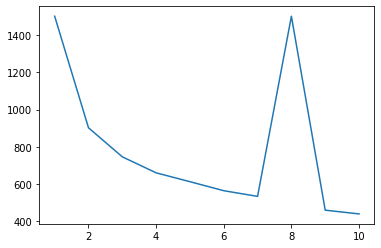

array([1503.        ,  902.05310859,  745.35596162,  659.1293402 ,
        611.41627019,  562.82624823,  532.24201093, 1503.        ,
        457.94245059,  437.72829601])

In [109]:
optimum = KMeansClass()
optimum.find_optimal_num_clusters(scaled_ds)

Untuk 2 kluster, silhouette_score : 0.33789641577411855
Untuk 3 kluster, silhouette_score : 0.24656765335572386
Untuk 4 kluster, silhouette_score : 0.23045335524019483
Untuk 5 kluster, silhouette_score : 0.20663052166539153


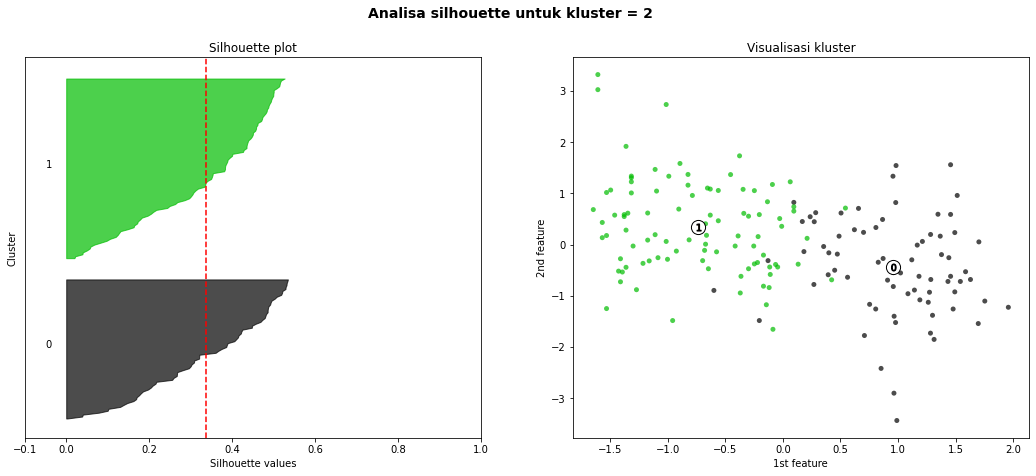

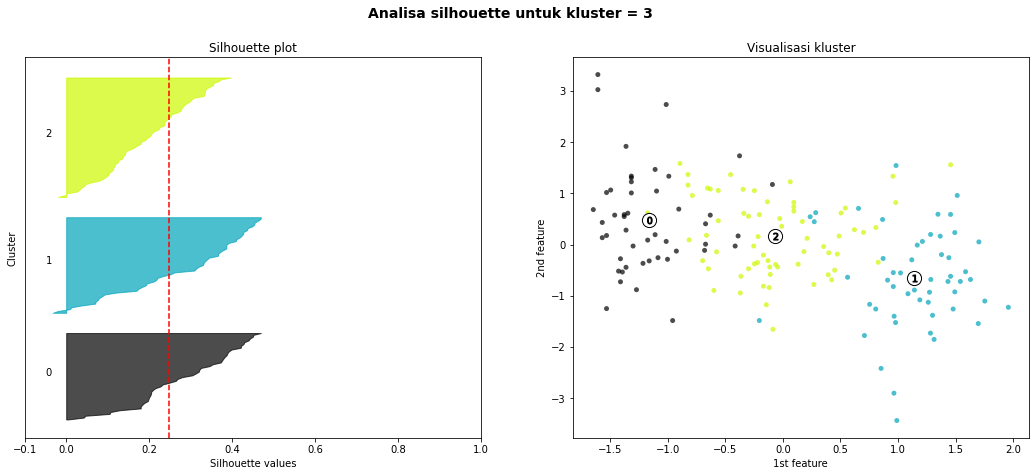

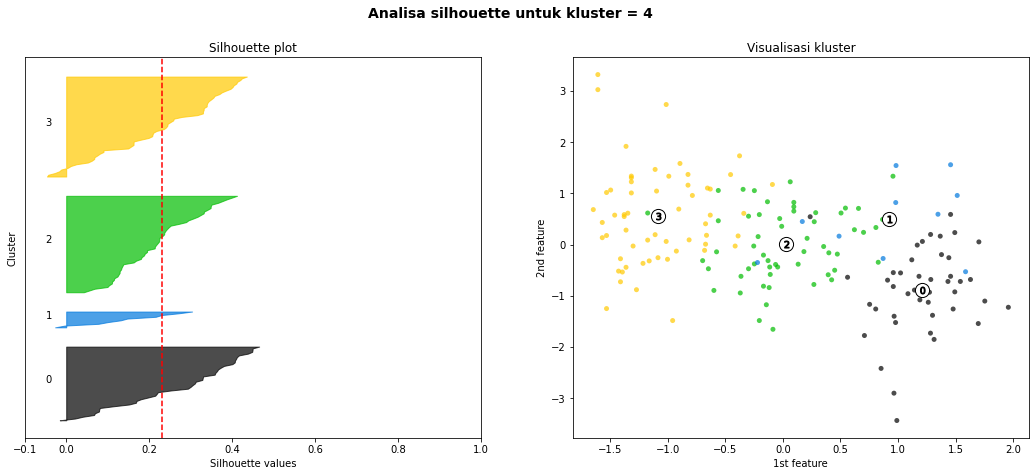

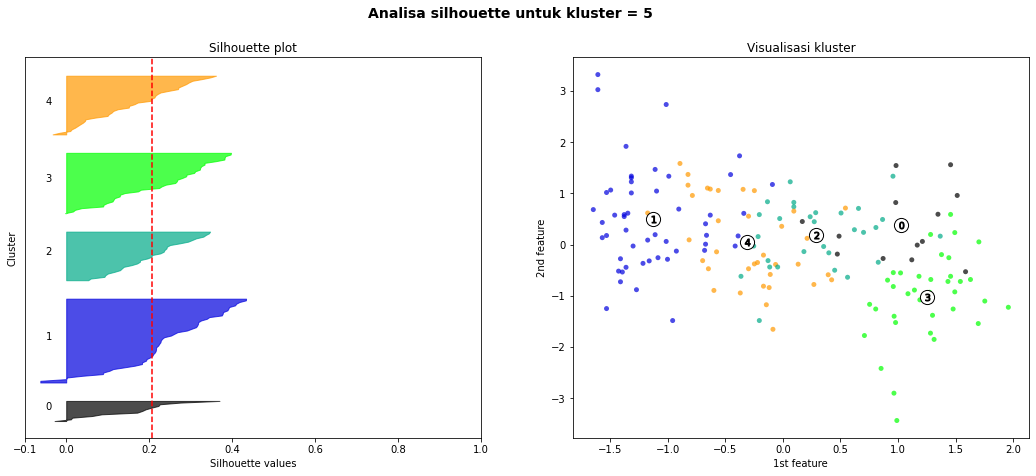

In [110]:
# melakukan pengecekan kluster terbaik berdasarkan grafik elbow
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(scaled_ds) + (n_clusters + 1) * 10])

    cluster_idx, centers, loss = KMeansClass()(scaled_ds, n_clusters)
    
    silhouette_avg = silhouette_score(scaled_ds, cluster_idx)
    print("Untuk", n_clusters, "kluster, silhouette_score :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(scaled_ds, cluster_idx)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_idx == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
        
    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette values")
    ax1.set_ylabel("Cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_idx.astype(float) / n_clusters)
    ax2.scatter(
        scaled_ds[:, 0], scaled_ds[:, 1], marker=".", s=100, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualisasi kluster")
    ax2.set_xlabel("1st feature")
    ax2.set_ylabel("2nd feature")

    plt.suptitle(
        "Analisa silhouette untuk kluster = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



In [111]:
# menambahkan kolom kluster pada dataframe
cluster_idx, centers, loss = KMeansClass()(scaled_ds, 2)
df['cluster'] = cluster_idx
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1


SUMBER:<br>
https://www.linkedin.com/pulse/clustering-countries-using-unsupervised-machine-learning-denegri/?trk=portfolio_article-card_title

https://nbviewer.org/github/SebastianoDenegri/Unsupervised-Machine-Learning-/blob/3c975b16f12f41a6966c692f52c87756dbdc7d39/Unsupervised%20Learning%20Project.ipynb

https://leo-you.github.io/Country-PCA-and-Custering/

https://analyticsarora.com/k-means-for-beginners-how-to-build-from-scratch-in-python/

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html